# EXPLORATORY DATA ANALYSIS

In this dataset, we have many features like ship mode, Segment, country, City, State, Postal code, Region, category, sub-category, sales, Quantity, discount, and the Dependent variable is profit. The remaining are independent variables.

Here we will see for weak areas where there is less profit and will see how to overcome it

### Objectives
* Working with dataset
* Creating loss dataframe
* Data Visualization
* Analysis from Heatmap

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset and view first 5 rows

In [2]:
df = pd.read_excel("Super Store Data.xlsx")
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,US-2017-102638,2017-12-29,2017-12-31,First Class,MC-17845,Michael Chen,Consumer,United States,New York City,New York,10035,East,OFF-FA-10002988,Office Supplies,Fasteners,Ideal Clamps,6.030,3,0.0,2.9547
1,US-2017-162068,2017-12-28,2017-12-31,Second Class,PC-18745,Pamela Coakley,Corporate,United States,Loveland,Colorado,80538,West,OFF-BI-10002813,Office Supplies,Binders,Avery Reinforcements for Hole-Punch Pages,1.188,2,0.7,-0.9900
2,CA-2017-101322,2017-12-28,2017-12-31,First Class,JG-15310,Jason Gross,Corporate,United States,Long Beach,California,90805,West,FUR-CH-10003968,Furniture,Chairs,Novimex Turbo Task Chair,340.704,6,0.2,-34.0704
3,CA-2017-134404,2017-12-27,2017-12-27,Same Day,DR-12880,Dan Reichenbach,Corporate,United States,Newark,Ohio,43055,East,TEC-PH-10000576,Technology,Phones,AT&T 1080 Corded phone,164.388,2,0.4,-35.6174
4,CA-2017-134404,2017-12-27,2017-12-27,Same Day,DR-12880,Dan Reichenbach,Corporate,United States,Newark,Ohio,43055,East,OFF-AR-10004441,Office Supplies,Art,BIC Brite Liner Highlighters,13.248,4,0.2,3.6432


### Number of rows and columns

In [3]:
df.shape

(10004, 20)

In the dataframe there are 10004 rows and 20 columns

### View all the columns in the dataframe

In [4]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### View the information like range index, data type and number of non - null entries

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       10004 non-null  object        
 1   Order Date     10004 non-null  datetime64[ns]
 2   Ship Date      10004 non-null  datetime64[ns]
 3   Ship Mode      10004 non-null  object        
 4   Customer ID    10004 non-null  object        
 5   Customer Name  10004 non-null  object        
 6   Segment        10004 non-null  object        
 7   Country        10004 non-null  object        
 8   City           10004 non-null  object        
 9   State          10004 non-null  object        
 10  Postal Code    10004 non-null  int64         
 11  Region         10004 non-null  object        
 12  Product ID     10004 non-null  object        
 13  Category       10004 non-null  object        
 14  Sub-Category   10004 non-null  object        
 15  Product Name   1000

### Convert postal code to string 

In [6]:
df['Postal Code'] = df['Postal Code'].astype('str')

### Check for the datatypes

In [7]:
df.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code              object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

### Check for null values

In [8]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

There are no null values over the entire dataset

### View unique categories in the dataset

In [9]:
df['Category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

### Unique states in the dataset

In [10]:
df['State'].unique()

array(['New York', 'Colorado', 'California', 'Ohio', 'Nebraska',
       'Alabama', 'Washington', 'New Jersey', 'Kentucky', 'Florida',
       'Arizona', 'Idaho', 'Louisiana', 'Massachusetts', 'Texas',
       'Connecticut', 'Arkansas', 'Tennessee', 'Illinois', 'Missouri',
       'Rhode Island', 'New Mexico', 'Minnesota', 'Michigan', 'Indiana',
       'South Carolina', 'Wisconsin', 'Pennsylvania', 'North Carolina',
       'Virginia', 'Oklahoma', 'Iowa', 'Mississippi', 'Nevada', 'Vermont',
       'Delaware', 'Maryland', 'Georgia', 'Kansas', 'Oregon',
       'South Dakota', 'Utah', 'West Virginia', 'Montana',
       'New Hampshire', 'North Dakota', 'District of Columbia', 'Wyoming',
       'Maine'], dtype=object)

### To view the number of unique entries in a column

In [11]:
number_of_states = df['State'].nunique()
print(f'There are {number_of_states} states in the dataframe.')

There are 49 states in the dataframe.


### Unique Sub-Category

In [12]:
df['Sub-Category'].unique()

array(['Fasteners', 'Binders', 'Chairs', 'Phones', 'Art', 'Storage',
       'Furnishings', 'Accessories', 'Tables', 'Bookcases', 'Paper',
       'Machines', 'Appliances', 'Copiers', 'Envelopes', 'Supplies',
       'Labels'], dtype=object)

In [13]:
number_of_subcategory = df['Sub-Category'].nunique()
print(f'Categories are divided into {number_of_subcategory} sub-categories.')

Categories are divided into 17 sub-categories.


In [14]:
df['Segment'].value_counts()

Consumer       5198
Corporate      3022
Home Office    1784
Name: Segment, dtype: int64

### Statistical Description of the Dataframe

In [15]:
df.describe()

,Sales,Quantity,Discount,Profit
count,10004.000000,10004.000000,10004.000000,10004.000000
mean,229.758992,3.788585,0.156147,28.655887
std,622.953196,2.224837,0.206381,234.145100
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.732125
50%,54.490000,3.000000,0.200000,8.671250
75%,209.947500,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


### Creating Loss Dataframe

In [16]:
loss_df = df[df['Profit'] < 0]

This will create a new dataframe with all the features where profit is less than zero

In [17]:
loss_df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1,US-2017-162068,2017-12-28,2017-12-31,Second Class,PC-18745,Pamela Coakley,Corporate,United States,Loveland,Colorado,80538,West,OFF-BI-10002813,Office Supplies,Binders,Avery Reinforcements for Hole-Punch Pages,1.188,2,0.7,-0.9900
2,CA-2017-101322,2017-12-28,2017-12-31,First Class,JG-15310,Jason Gross,Corporate,United States,Long Beach,California,90805,West,FUR-CH-10003968,Furniture,Chairs,Novimex Turbo Task Chair,340.704,6,0.2,-34.0704
3,CA-2017-134404,2017-12-27,2017-12-27,Same Day,DR-12880,Dan Reichenbach,Corporate,United States,Newark,Ohio,43055,East,TEC-PH-10000576,Technology,Phones,AT&T 1080 Corded phone,164.388,2,0.4,-35.6174
5,CA-2017-112487,2017-12-26,2017-12-30,Standard Class,TC-21535,Tracy Collins,Home Office,United States,Columbus,Ohio,43229,East,OFF-BI-10000494,Office Supplies,Binders,Acco Economy Flexible Poly Round Ring Binder,3.132,2,0.7,-2.6100
9,US-2017-147669,2017-12-25,2017-12-30,Standard Class,SV-20935,Susan Vittorini,Consumer,United States,Fairfield,Ohio,45014,East,OFF-BI-10000632,Office Supplies,Binders,Satellite Sectional Post Binders,13.023,1,0.7,-10.4184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,CA-2017-163860,2017-12-28,2018-01-01,Standard Class,LO-17170,Lori Olson,Corporate,United States,Peoria,Illinois,61604,Central,FUR-CH-10004698,Furniture,Chairs,"Padded Folding Chairs, Black, 4/Carton",113.372,2,0.3,-3.2392
9994,CA-2017-163860,2017-12-28,2018-01-01,Standard Class,LO-17170,Lori Olson,Corporate,United States,Peoria,Illinois,61604,Central,FUR-FU-10001935,Furniture,Furnishings,3M Hangers With Command Adhesive,2.960,2,0.6,-1.4060
9999,CA-2017-134194,2017-12-25,2018-01-01,Standard Class,GA-14725,Guy Armstrong,Consumer,United States,Dallas,Texas,75081,Central,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,39.582,9,0.8,-59.3730
10002,CA-2017-134194,2017-12-25,2018-01-01,Standard Class,GA-14725,Guy Armstrong,Consumer,United States,Dallas,Texas,75081,Central,OFF-BI-10001597,Office Supplies,Binders,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",40.980,5,0.8,-65.5680


### Shape of loss_df

In [18]:
loss_df.shape

(1872, 20)

There are 1872 rows and 20 columns

### Statistical description of the loss dataframe

In [19]:
loss_df.describe()

,Sales,Quantity,Discount,Profit
count,1872.000000,1872.000000,1872.000000,1872.000000
mean,250.379369,3.762286,0.480737,-83.403788
std,714.899063,2.140847,0.235107,284.353850
min,0.444000,1.000000,0.100000,-6599.978000
25%,12.442500,2.000000,0.200000,-58.647825
50%,71.029000,3.000000,0.400000,-18.073500
75%,284.643000,5.000000,0.700000,-6.237000
max,22638.480000,14.000000,0.800000,-0.089500


### Total Loss

In [20]:
total_loss = np.negative(loss_df['Profit'].sum())
print(f'Total Loss = {total_loss}')

Total Loss = 156131.8905


In [21]:
loss_df.groupby('Segment').sum()

,Sales,Quantity,Discount,Profit
Segment,,,,
Consumer,247199.2700,3654,476.96,-84946.3160
Corporate,131860.5383,2191,272.00,-44787.2076
Home Office,89650.3705,1198,150.98,-26398.3669


* This shows that more discount leads to more loss.
* To make more profit provide fewer discounts.

In [22]:
loss_df.groupby('Sub-Category').sum()

,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Accessories,10958.8000,330,18.20,-930.6265
Appliances,3382.5340,235,53.60,-8629.6412
Binders,36140.6130,2456,452.40,-38510.4964
Bookcases,48072.7408,422,37.99,-12152.2060
Chairs,91988.4560,876,61.40,-9880.8413
Fasteners,152.3040,58,2.60,-33.8000
Furnishings,12845.8440,597,88.60,-6490.9134
Machines,72456.2530,157,25.60,-30118.6682
Phones,35797.8400,476,46.60,-7530.6235


* Here we can observe more loss in the Binders catogery, machines categoy, and tables category when compared to other categories.

* Binders are more getting sold. So even giving less doscount may lead to vast loss.

* So better to give discounts on which are getting less sold so that even they will start getting sold more.

In [23]:
loss_df['Sub-Category'].value_counts()

Binders        613
Chairs         235
Tables         203
Furnishings    167
Storage        161
Phones         136
Bookcases      109
Accessories     91
Appliances      67
Machines        44
Supplies        33
Fasteners       13
Name: Sub-Category, dtype: int64

### List of names of the Top 10 cities where loss is high

In [24]:
loss_df.groupby('City').sum().sort_values('Profit', ascending = True).head(10)

,Sales,Quantity,Discount,Profit
City,,,,
Philadelphia,70460.5510,892,115.30,-19590.7411
Houston,37640.7304,683,104.14,-14785.3668
Chicago,19910.0120,541,88.20,-11120.6271
San Antonio,17395.1450,139,17.10,-7831.0254
Lancaster,7699.2420,71,9.40,-7632.4946
Burlington,12044.8740,19,2.00,-5999.3318
Dallas,9994.0562,280,39.30,-4208.5218
Jacksonville,31146.2710,154,18.85,-4059.9857
New York City,19533.8020,132,12.20,-3966.0226


### Mean of Sales in each category

In [25]:
loss_df.sort_values(['Sales'], ascending = True).groupby('Category').mean()

,Sales,Quantity,Discount,Profit
Category,,,,
Furniture,361.184295,3.714286,0.367143,-85.344690
Office Supplies,103.282637,3.864713,0.617136,-63.828482
Technology,439.899974,3.553506,0.333579,-142.361322


* We can observe that more loss is in the technology category

### List of the names of Top 10 states where sales are very less

In [26]:
df.groupby(['State']).sum()['Sales'].nsmallest(10)

State
North Dakota             919.910
West Virginia           1209.824
Maine                   1270.530
South Dakota            1315.560
Wyoming                 1603.136
District of Columbia    2865.020
Kansas                  2914.310
Idaho                   4382.486
Iowa                    4579.760
New Mexico              4783.522
Name: Sales, dtype: float64

In [27]:
df.sort_values(['Segment'], ascending=True).groupby('Segment').sum()

,Sales,Quantity,Discount,Profit
Segment,,,,
Consumer,1.162466e+06,19543,821.51,134328.1783
Corporate,7.061810e+05,11612,478.25,91990.1278
Home Office,4.298624e+05,6746,262.33,60355.1895


* Here Consumer segment sales might be less when compared to other segments, but this is only segment that provides the highest profit.
* So, if we increase sales in this Segment by advertisements or something else then, for sure, we can gain more profits.

In [28]:
df.groupby('Region').sum()

,Sales,Quantity,Discount,Profit
Region,,,,
Central,501449.1908,8782,558.34,39762.8735
East,679248.0820,10632,414.40,91557.4165
South,392316.2150,6214,238.55,46924.3677
West,725495.4725,12273,350.80,108428.8379


Here we can observe that sales are less in the South Region. So, to get better profits or more sales we should focus on this ares too.

## DATA VISUALIZATION

In [29]:
plt.rcParams['figure.figsize']=(15,3)

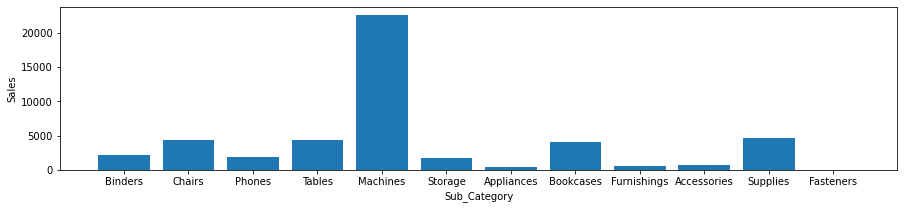

In [30]:
plt.bar(loss_df['Sub-Category'],loss_df['Sales']);
plt.rcParams.update({'font.size':10});
plt.xlabel('Sub_Category');
plt.ylabel('Sales');

Here, we observed that the Sales for Fasteners, Appliances, Furnishing and Accessories is very low.

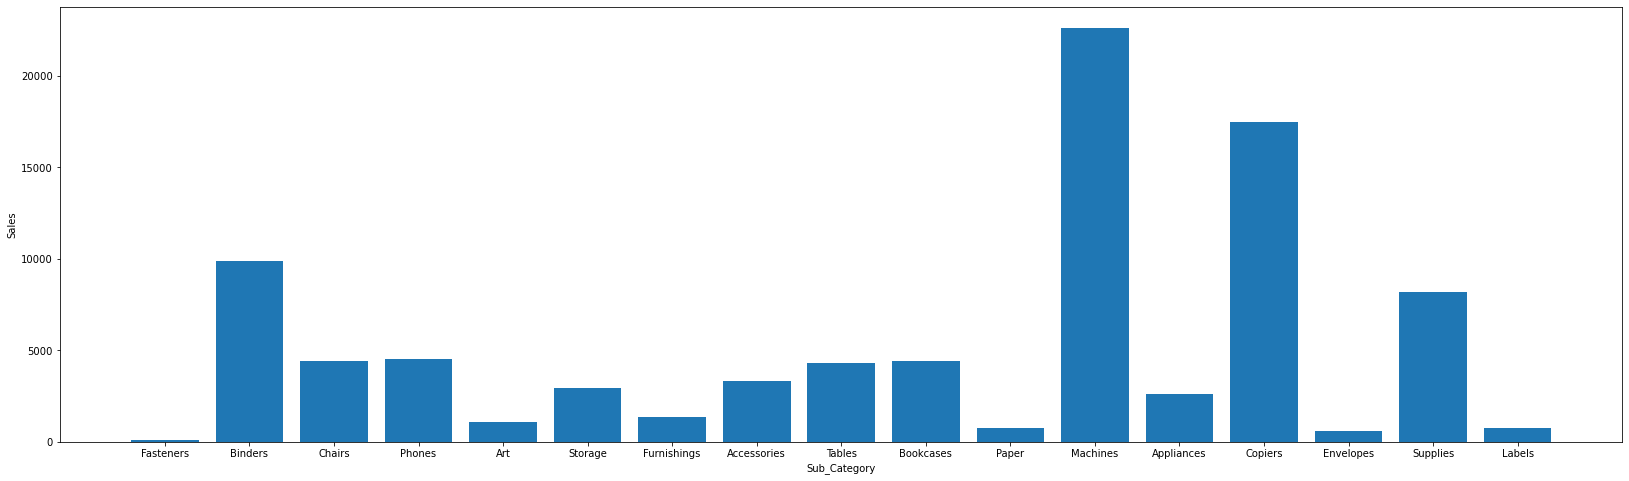

In [31]:
plt.rcParams['figure.figsize']=(28,8)
plt.bar(df['Sub-Category'], df['Sales']);
plt.rcParams.update({'font.size':14});
plt.xlabel('Sub_Category');
plt.ylabel('Sales');

When it comes to comparison in overall supermarket data, Fastners, Labels, Furnishings, Art, paper, Envelopes etc, sub-categories have very fewer sales, that's why it needs to be improves.

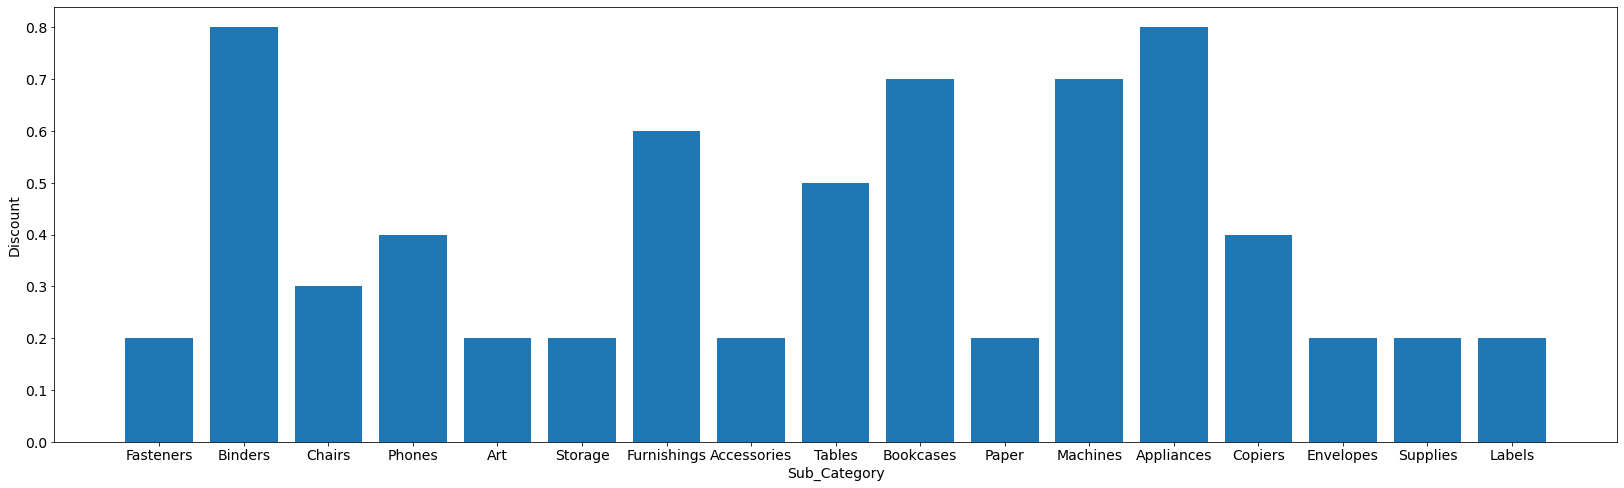

In [32]:
plt.rcParams['figure.figsize']=(28,8)
plt.bar(df['Sub-Category'], df['Discount']);
plt.rcParams.update({'font.size':14});
plt.xlabel('Sub_Category');
plt.ylabel('Discount');

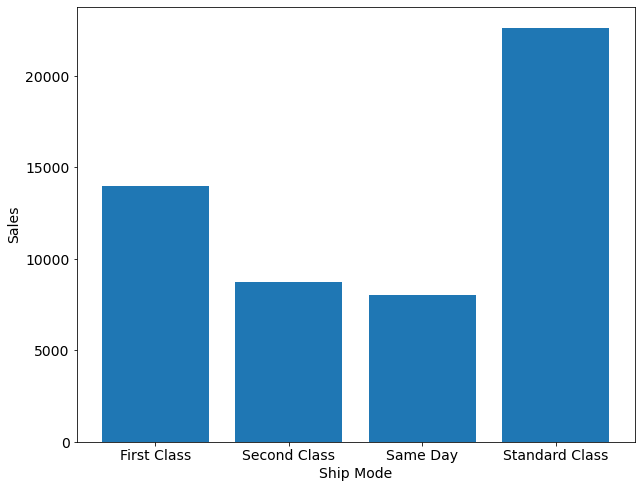

In [33]:
plt.rcParams['figure.figsize']=(10,8)
plt.bar(df['Ship Mode'],df['Sales']);
plt.rcParams.update({'font.size':14});
plt.xlabel('Ship Mode');
plt.ylabel('Sales');

Here we observe that the sales are high if the ship mode is standard class, and sales are low if the ship mode is wither second class or same day.

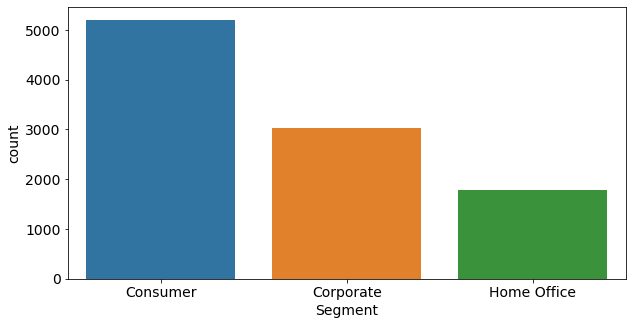

In [34]:
plt.rcParams['figure.figsize']=(10,5)
sns.countplot(x=df.Segment)
plt.show();

In the Home Office Segment, we observe that the count is less. So convergent strategy and improvement is a necessity for this Segment.

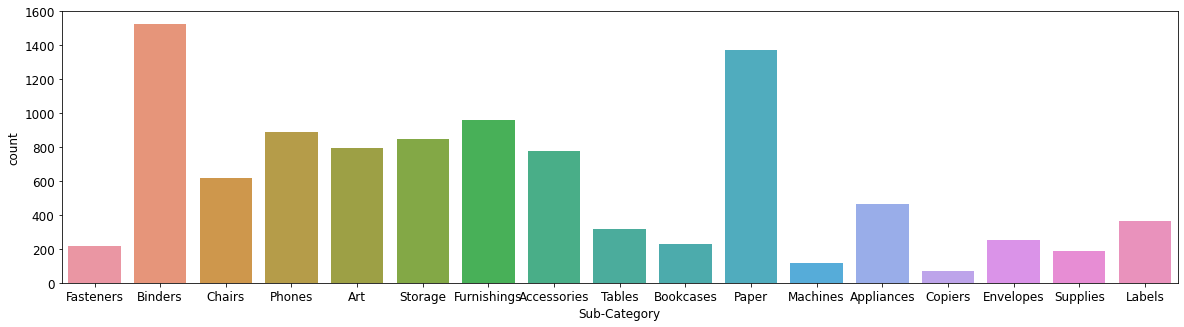

In [35]:
plt.rcParams['figure.figsize']=(20,5)
plt.rcParams.update({'font.size':12})
sns.countplot(x='Sub-Category',data=df)
plt.show()

From the above data, it’s very much clear that the Copiers and Machines Subcategory needs improvement.

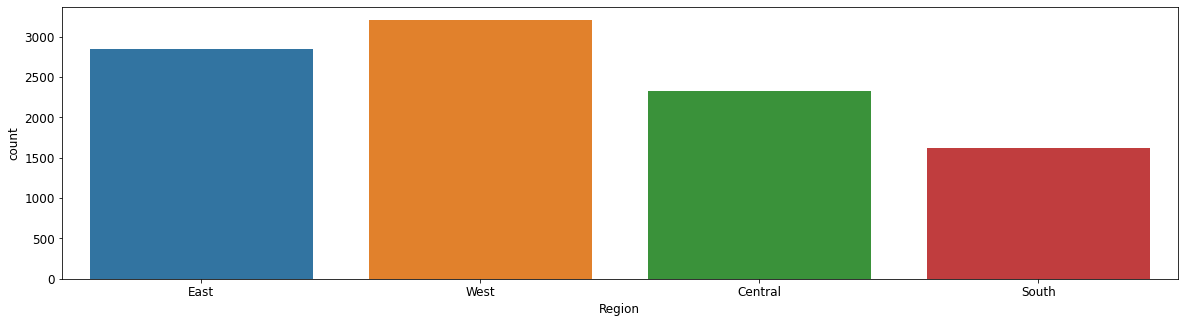

In [36]:
plt.rcParams['figure.figsize']=(20,5)
plt.rcParams.update({'font.size':12})
sns.countplot(x='Region',data=df)
plt.show()

If we look into the data region-wise, we can conclude that the south region needs more improvement compared to others.

### Correlation

In [37]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200786,-0.028179,0.479065
Quantity,0.200786,1.000000,0.008739,0.066194
Discount,-0.028179,0.008739,1.000000,-0.219490
Profit,0.479065,0.066194,-0.219490,1.000000


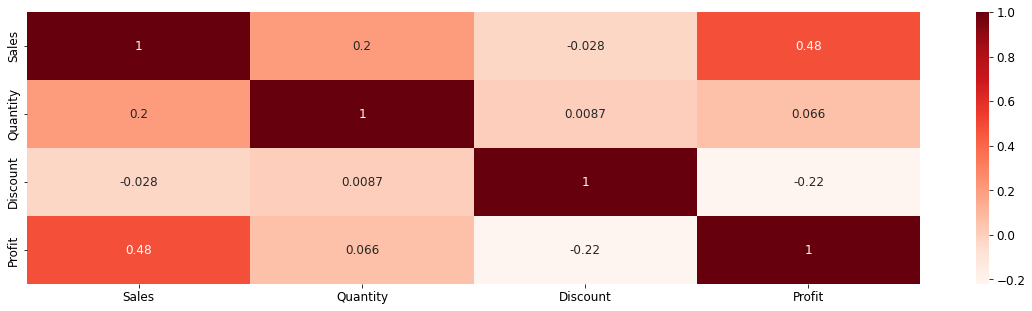

In [38]:
sns.heatmap(df.corr(),cmap='Reds',annot=True);
plt.rcParams['figure.figsize']=(10,5)

### Analysis from Heatmap
* Sales and Profit are Moderately Correlated
* Discount and Profit are Negatively Correlated

### Overall Analysis
* The main reason which leads to loss is Discount as if some areas lead to loss due to more discounts, and some areas lead to fewer sales due to fewer discounts, hence it needs to be improved.
* It is better to give more discounts during festival seasons, additionally, that will result in more sales.
* The Home office segment needs better improvement.
* Some cities have fewer sales, lack of awareness can be the reason for this, hence advertising in those cities might help in more sales.